# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
# !wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
# !unzip dogImages
# !unzip lfw

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


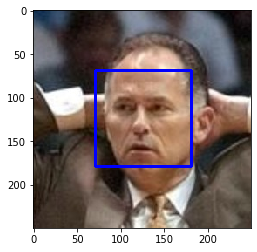

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[2])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

### Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__
    - 99% of the first 100 images in `human_files` have a detected human face.
    - 10% of the first 100 images in `dog_files` have a detected human face.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## DONE: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

detected_face_human = 0
detected_face_dog = 0

for human_img in human_files_short:
    if face_detector(human_img):
        detected_face_human += 1

for dog_img in dog_files_short:
    if face_detector(dog_img):
        detected_face_dog += 1

print("{0:.0%}".format(detected_face_human/100))
print("{0:.0%}".format(detected_face_dog/100))

99%
10%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

__Answer:__ After testing performance of the multi-task convolutional neural network face detection (MTCNN) algorithm, these were the results:
    - 100% of the first 100 images in `human_files` have a detected human face.
    - 29% of the first 100 images in `dog_files` have a detected human face.
The previous implementation of OpenCV already achieved very high face detection in human images (99%) and at marginal rates in dog images (10%). The MTCNN implementation, although at 100% for human face detection, detects faces in more dog images (up 19%). Model performance, however, needs to be weighed against needed functionality. For instance, in a national security application there might be a requirement not to miss any images containing human faces, and in that scenario the MTCNN would be better suited to the task.

> Kaipeng Zhang, Zhanpeng Zhang, Zhifeng Li, and Yu Qiao. [Joint Face Detection and Alignment Using Multi-task Cascaded Convolutional Networks](https://kpzhang93.github.io/MTCNN_face_detection_alignment). In _IEEE Signal Processing Letters_, 2016.

In [5]:
import numpy as np
from facenet_pytorch import MTCNN

### (Optional) 
### DONE: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

# returns "True" if face is detected in image stored at img_path
def face_detector_deep_learning(img_path):
    
    # load image from file
    pixels = plt.imread(img_path)
    
    # create the detector, using default weights
    detector = MTCNN(post_process=False, device='cuda')
    
    # detect faces in the image
    faces, _ = detector.detect(pixels)
    
    return faces is not None

In [6]:
import matplotlib.pyplot as plt

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

## DONE: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

detected_face_human = 0
detected_face_dog = 0

for human_img in human_files_short:
    if face_detector_deep_learning(human_img):
        detected_face_human += 1

for dog_img in dog_files_short:
    if face_detector_deep_learning(dog_img):
        detected_face_dog += 1

print("{0:.0%}".format(detected_face_human/100))
print("{0:.0%}".format(detected_face_dog/100))

/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


100%
29%


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/ec2-user/.cache/torch/checkpoints/vgg16-397923af.pth


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
from torchvision import transforms as T

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## DONE: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that 
    
    # load image from file
    img = Image.open(img_path)
    
    # all pre-trained models expect input images normalized in the same way
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W)
    # H and W are expected to be at least 224
    transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor()])
    transformed_img = transform(img)
    
    # the images have to be loaded in to a range of [0, 1]
    # then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]
    normalize = T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    normalized_img = normalize(transformed_img)
    
    # model loading
    tensor_img = normalized_img.unsqueeze(0)
    
    # check if CUDA is available
    use_cuda = torch.cuda.is_available()

    # move image tensor to GPU if CUDA is available
    if use_cuda:
        tensor_img = tensor_img.cuda()
        
    prediction = VGG16(tensor_img)

    # move model prediction to CPU if CUDA is available
    if use_cuda:
        prediction = prediction.cpu()
        
    # convert predicted probabilities to class index
    tensor_prediction = torch.argmax(prediction)
    
    # move prediction tensor to CPU if CUDA is available
    if use_cuda:
        tensor_prediction = tensor_prediction.cpu()
    
    predicted_class_index = int(np.squeeze(tensor_prediction.numpy()))
    
    return predicted_class_index # predicted class index

In [9]:
test_img = dog_files[6]
print(f'test_img: https://github.com/Supearnesh/ml-dog-cnn/blob/master/{test_img}')
VGG16_predict(test_img)

test_img: https://github.com/Supearnesh/ml-dog-cnn/blob/master/dogImages/valid/004.Akita/Akita_00235.jpg


263

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## DONE: Complete the function.
    dog_range = range(151, 268)
    
    predicted_class_index = VGG16_predict(img_path)
    
    return predicted_class_index in dog_range # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__
    - 0% of the images in `human_files_short` have a detected dog.
    - 97% of the images in `dog_files_short` have a detected dog.

In [11]:
### DONE: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

detected_dog_human = 0
detected_dog_dog = 0

for human_img in human_files_short:
    if dog_detector(human_img):
        detected_dog_human += 1

for dog_img in dog_files_short:
    if dog_detector(dog_img):
        detected_dog_dog += 1

print("{0:.0%}".format(detected_dog_human/100))
print("{0:.0%}".format(detected_dog_dog/100))

0%
97%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

__Answer:__ After testing performance of the Inception-V3 model, these were the results:
    - 2% of the first 100 images in `human_files` have a detected dog.
    - 98% of the first 100 images in `dog_files` have a detected dog.
The results between the VGG-16 and Inception-V3 models are very marginal and they perform about the same.

In [12]:
import torch
import torchvision.models as models

### (Optional)
### DONE: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# define Inception-v3 model
inception = models.inception_v3(pretrained=True)
inception = inception.eval()

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    inception = inception.cuda()

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /home/ec2-user/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth


In [13]:
def inception_predict(img_path):
    '''
    Use pre-trained Inception-v3 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to Inception-v3 model's prediction
    '''
    
    ## DONE: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that 
    
    # load image from file
    img = Image.open(img_path)
    
    # all pre-trained models expect input images normalized in the same way
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W)
    # inception_v3 expects tensors with a size of N x 3 x 299 x 299
    transform = T.Compose([T.Resize(299), T.CenterCrop(299), T.ToTensor()])
    transformed_img = transform(img)
    
    # the images have to be loaded in to a range of [0, 1]
    # then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]
    normalize = T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    normalized_img = normalize(transformed_img)
    
    # model loading
    tensor_img = normalized_img.unsqueeze(0)
    
    # check if CUDA is available
    use_cuda = torch.cuda.is_available()

    # move image tensor to GPU if CUDA is available
    if use_cuda:
        tensor_img = tensor_img.cuda()
        
    prediction = inception(tensor_img)

    # move model prediction to CPU if CUDA is available
    if use_cuda:
        prediction = prediction.cpu()
        
    # convert predicted probabilities to class index
    tensor_prediction = torch.argmax(prediction)
    
    # move prediction tensor to CPU if CUDA is available
    if use_cuda:
        tensor_prediction = tensor_prediction.cpu()
    
    predicted_class_index = int(np.squeeze(tensor_prediction.numpy()))
    
    return predicted_class_index # predicted class index

In [14]:
test_img = dog_files[6]
print(f'test_img: https://github.com/Supearnesh/ml-dog-cnn/blob/master/{test_img}')
inception_predict(test_img)

test_img: https://github.com/Supearnesh/ml-dog-cnn/blob/master/dogImages/valid/004.Akita/Akita_00235.jpg


248

In [15]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_inception(img_path):
    ## DONE: Complete the function.
    dog_range = range(151, 268)
    
    predicted_class_index = inception_predict(img_path)
    
    return predicted_class_index in dog_range # true/false

In [16]:
### DONE: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

detected_dog_human = 0
detected_dog_dog = 0

for human_img in human_files_short:
    if dog_detector_inception(human_img):
        detected_dog_human += 1

for dog_img in dog_files_short:
    if dog_detector_inception(dog_img):
        detected_dog_dog += 1

print("{0:.0%}".format(detected_dog_human/100))
print("{0:.0%}".format(detected_dog_dog/100))

2%
98%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="img/Brittany_02625.jpg" width="100"> | <img src="img/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="img/Curly-coated_retriever_03896.jpg" width="200"> | <img src="img/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="img/Labrador_retriever_06457.jpg" width="150"> | <img src="img/Labrador_retriever_06455.jpg" width="240"> | <img src="img/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [17]:
import os
from PIL import Image
from torchvision import datasets
from torchvision import transforms as T
from torch.utils.data import DataLoader

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### DONE: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor()]) 

dataset_train = datasets.ImageFolder('dogImages/train', transform=transform)
dataset_valid = datasets.ImageFolder('dogImages/valid', transform=transform)
dataset_test = datasets.ImageFolder('dogImages/test', transform=transform)

loader_train = DataLoader(dataset_train, batch_size=1, shuffle=False)
loader_valid = DataLoader(dataset_valid, batch_size=1, shuffle=False)
loader_test = DataLoader(dataset_test, batch_size=1, shuffle=False)

loaders_scratch = {'train': loader_train, 'valid': loader_valid, 'test': loader_test}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: The images were resized to 256 x 256 and then centercropped to create an image tensor of size 224 x 224 x 3, these were the same parameters used for the VGG_16 model. The dataset was not augmented by adding flipped/rotated images in the interest of time, although that is an effective method for increasing the training size. The goal of this exercise was to establish a baseline for a CNN that would later be overtaken by transfer learning.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### DONE: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer (sees 224x224x3 tensor)
        self.conv_01 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        # batch normalization applied to convolutional layer
        self.norm_01 = nn.BatchNorm2d(32)
        # convolutional layer (sees 112x112x32 tensor)
        self.conv_02 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # batch normalization applied to convolutional layer
        self.norm_02 = nn.BatchNorm2d(64)
        # convolutional layer (sees 56x56x64 tensor)
        self.conv_03 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        # batch normalization applied to convolutional layer
        self.norm_03 = nn.BatchNorm2d(128)
        # convolutional layer pooled (sees 28x28x128 tensor)
        self.conv_04 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        # batch normalization applied to convolutional layer
        self.norm_04 = nn.BatchNorm2d(256)
        # convolutional layer pooled (sees 7x7x256 tensor)
        self.conv_05 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        # batch normalization applied to convolutional layer
        self.norm_05 = nn.BatchNorm2d(512)
        # max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # linear layer (7 * 7 * 512 -> 500)
        self.fc_01 = nn.Linear(512 * 7 * 7, 4096)
        # linear layer (4096 -> 133)
        self.fc_02 = nn.Linear(4096, 133)
        # dropout layer (p = 0.50)
        self.dropout = nn.Dropout(0.50)
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.norm_01(self.conv_01(x))))
        x = self.pool(F.relu(self.norm_02(self.conv_02(x))))
        x = self.pool(F.relu(self.norm_03(self.conv_03(x))))
        x = self.pool(F.relu(self.norm_04(self.conv_04(x))))
        x = self.pool(F.relu(self.norm_05(self.conv_05(x))))
        # flatten image input
        x = x.view(-1, 7 * 7 * 512)
        # add dropout layer
        x = self.dropout(x)
        # add first hidden layer, with relu activation function
        x = F.relu(self.fc_01(x))
        # add dropout layer
        x = self.dropout(x)
        # add second hidden layer, with relu activation function
        x = self.fc_02(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# create a complete CNN
model_scratch = Net()
print(model_scratch)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv_01): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm_01): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_02): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm_02): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_03): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm_03): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_04): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm_04): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_05): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm_05): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_01): Linear(in_features=25088, out_fe

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ The CNN contains five convolutional layers, all normalized and max-pooled, and two fully connected layers with dropout configured at 50% probability. This architecture was inspired by by the AlexNet model. All layers use Rectified Linear Units (ReLUs) for the reduction in training times as documented by Nair and Hinton. Even after all of this, the trained model performed quite poorly with the validation loss function severely increasing as the training loss function decreased, a classic sign of bad overfitting. Ultimately, the model managed to identify less than 10% of dog breeds correctly from the test set. Despite several hours worth of efforts to combat the overfitting problem, such as trying many iterations of simpler architectures containing only three convolutional layers and increasing the dropout probability of the fully connected layers, the model's performance did not improve.

> Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton. [ImageNet Classification with Deep Convolutional Neural Networks](https://www.cs.toronto.edu/~hinton/absps/imagenet.pdf). In _Proceedings of NIPS_, 2012.

> Vinod Nair and Geoffrey Hinton. [Rectified Linear Units Improve Restricted Boltzmann Machines](https://www.cs.toronto.edu/~fritz/absps/reluICML.pdf). In _Proceedings of ICML_, 2010.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [19]:
import torch.optim as optim

### DONE: select loss function
criterion_scratch = nn.CrossEntropyLoss()

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move loss function to GPU if CUDA is available
if use_cuda:
    criterion_scratch = criterion_scratch.cuda()

### DONE: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [20]:
%%time

import numpy as np

# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # check if CUDA is available
            use_cuda = torch.cuda.is_available()
            # move to GPU if CUDA is available
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # check if CUDA is available
            use_cuda = torch.cuda.is_available()
            # move tensors to GPU if CUDA is available
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## DONE: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print(f'The validation loss has decreased from {valid_loss_min} to {valid_loss}.')
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
            
    # return trained model
    return model

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 17.4 µs


In [21]:
n_epochs = 25

# train the model
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 0.445741 	Validation Loss: 10.175924
The validation loss has decreased from inf to 10.175924301147461.
Epoch: 2 	Training Loss: 0.586438 	Validation Loss: 10.990441
Epoch: 3 	Training Loss: 0.566401 	Validation Loss: 12.034392
Epoch: 4 	Training Loss: 0.532577 	Validation Loss: 11.008715
Epoch: 5 	Training Loss: 0.458615 	Validation Loss: 11.883940
Epoch: 6 	Training Loss: 0.409945 	Validation Loss: 13.760242
Epoch: 7 	Training Loss: 0.370496 	Validation Loss: 14.300554
Epoch: 8 	Training Loss: 0.348188 	Validation Loss: 14.621387
Epoch: 9 	Training Loss: 0.312944 	Validation Loss: 15.393402
Epoch: 10 	Training Loss: 0.287283 	Validation Loss: 15.521316
Epoch: 11 	Training Loss: 0.271520 	Validation Loss: 17.981428
Epoch: 12 	Training Loss: 0.268436 	Validation Loss: 16.360828
Epoch: 13 	Training Loss: 0.257777 	Validation Loss: 16.074051
Epoch: 14 	Training Loss: 0.269222 	Validation Loss: 18.441126
Epoch: 15 	Training Loss: 0.262535 	Validation Loss: 18.33368

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [22]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [23]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 10.074448


Test Accuracy:  0% ( 4/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [24]:
## DONE: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [25]:
import torchvision.models as models
import torch.nn as nn
import torch

## DONE: Specify model architecture 
model_transfer = models.vgg19(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.classifier[6] = nn.Linear(4096, 133)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move to GPU
if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /home/ec2-user/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ The pretrained VGG-19 model contains the same architecture as that described by Simonyan and Zisserman in their paper, cited below. The results attained by their model showed great promise for a similar image classification problem and it made sense to reuse the same architecture, only modifying the final fully connected layer to correctly map to the 133 categories being used to classify dog breeds.


> Karen Simonyan and Andrew Zisserman. [Very Deep Convolutional Neural Network Based Image Classification Using Small Training Sample Size](https://arxiv.org/pdf/1409.1556.pdf). In _Proceedings of ICLR_, 2015.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [26]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move loss function to GPU if CUDA is available
if use_cuda:
    criterion_transfer = criterion_transfer.cuda()

optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [27]:
n_epochs = 25

# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.853376 	Validation Loss: 3.733051
The validation loss has decreased from inf to 3.733050584793091.
Epoch: 2 	Training Loss: 0.502531 	Validation Loss: 2.995150
The validation loss has decreased from 3.733050584793091 to 2.995149612426758.
Epoch: 3 	Training Loss: 0.407349 	Validation Loss: 2.565003
The validation loss has decreased from 2.995149612426758 to 2.565002918243408.
Epoch: 4 	Training Loss: 0.354367 	Validation Loss: 2.373466
The validation loss has decreased from 2.565002918243408 to 2.3734657764434814.
Epoch: 5 	Training Loss: 0.335390 	Validation Loss: 2.149204
The validation loss has decreased from 2.3734657764434814 to 2.1492044925689697.
Epoch: 6 	Training Loss: 0.315802 	Validation Loss: 2.092412
The validation loss has decreased from 2.1492044925689697 to 2.092411518096924.
Epoch: 7 	Training Loss: 0.301935 	Validation Loss: 1.972365
The validation loss has decreased from 2.092411518096924 to 1.972365379333496.
Epoch: 8 	Training Loss: 0.288

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [28]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.388770


Test Accuracy: 60% (506/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
### DONE: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

data_transfer = loaders_transfer

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    global model_transfer
    
    # load image from file
    img = Image.open(img_path)
    
    # all pre-trained models expect input images normalized in the same way
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W)
    # H and W are expected to be at least 224
    transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor()])
    transformed_img = transform(img)
    
    # the images have to be loaded in to a range of [0, 1]
    # then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]
    normalize = T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    normalized_img = normalize(transformed_img)
    
    # model loading
    tensor_img = normalized_img.unsqueeze(0)
    
    # check if CUDA is available
    use_cuda = torch.cuda.is_available()
    
    # move image tensor to GPU if CUDA is available
    if use_cuda:
        tensor_img = tensor_img.cuda()
    
    # make prediction by passing image tensor to model
    prediction = model_transfer(tensor_img)
    
    # move model prediction to GPU if CUDA is available
    if use_cuda:
        model_transfer = model_transfer.cuda()
    
    # convert predicted probabilities to class index
    tensor_prediction = torch.argmax(prediction)
    
    # move prediction tensor to CPU if CUDA is available
    if use_cuda:
        tensor_prediction = tensor_prediction.cpu()
    
    predicted_class_index = int(np.squeeze(tensor_prediction.numpy()))
    
    return class_names[predicted_class_index] # predicted class index

In [30]:
test_img = dog_files[12]
print(f'test_img: https://github.com/Supearnesh/ml-dog-cnn/blob/master/{test_img}')
print(f'prediction: {predict_breed_transfer(test_img)}')

test_img: https://github.com/Supearnesh/ml-dog-cnn/blob/master/dogImages/valid/044.Cane_corso/Cane_corso_03177.jpg
prediction: Cane corso


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [31]:
### DONE: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
    if face_detector(img_path):
        prediction = predict_breed_transfer(img_path)
        print(f'This human resembles the {prediction} dog breed.')
    elif dog_detector(img_path):
        prediction = predict_breed_transfer(img_path)
        print(f'This dog is of the {prediction} dog breed.')
    else:
        print('Invalid Input Error: This is not an image of a human or a dog.')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output was not as good as I've come to expect from my other machine learning projects. I believe that the performance can be tangibly improved my making the following changes:
* augmenting the training dataset by adding flipped/rotated images would yield a much larger training set and ultimately give better results
* experimenting with even more CNN architectures could potentially lead to uncovering a more effective architecture with less overfitting
* utilizing more training epochs, given more time, would both grant the training algorithms more time to converge at the local minimum and help discover patterns in training that could aid in identifying points of improvement

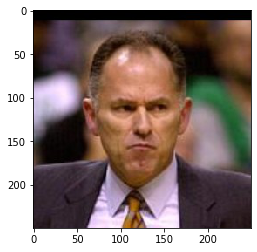

This human resembles the Australian shepherd dog breed.


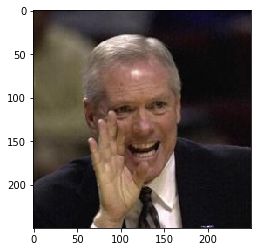

This human resembles the Poodle dog breed.


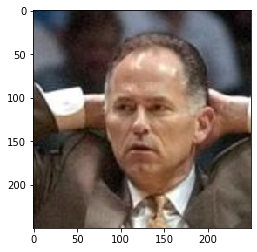

This human resembles the Ibizan hound dog breed.


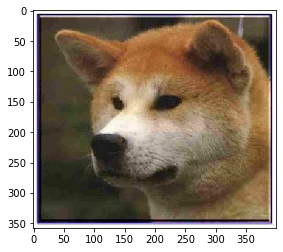

Invalid Input Error: This is not an image of a human or a dog.


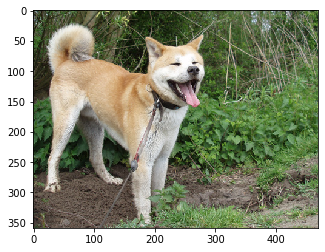

This dog is of the Norwegian lundehund dog breed.


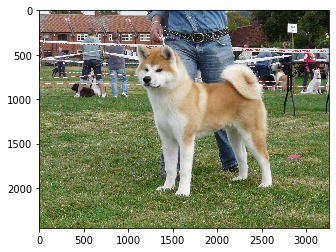

This human resembles the Pembroke welsh corgi dog breed.


In [32]:
## DONE: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

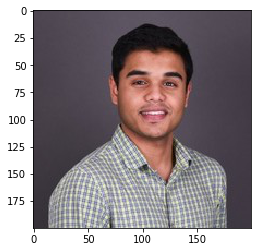

Dachshund


In [33]:
import urllib
import matplotlib.pyplot as plt

img = Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/Supearnesh/ml-dog-cnn/master/img/arnesh_sahay.jpg'))

plt.imshow(img)
plt.show()

transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor()])
transformed_img = transform(img)

# the images have to be loaded in to a range of [0, 1]
# then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]
normalize = T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
normalized_img = normalize(transformed_img)

# model loading
tensor_img = normalized_img.unsqueeze(0)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move image tensor to GPU if CUDA is available
if use_cuda:
    tensor_img = tensor_img.cuda()

# make prediction by passing image tensor to model
prediction = model_transfer(tensor_img)
# convert predicted probabilities to class index
tensor_prediction = torch.argmax(prediction)

# move prediction tensor to CPU if CUDA is available
if use_cuda:
    tensor_prediction = tensor_prediction.cpu()

predicted_class_index = int(np.squeeze(tensor_prediction.numpy()))

class_out = class_names[predicted_class_index] # predicted class index

print(class_out)